Importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pickle
import warnings
warnings.filterwarnings("ignore") 


Loading dataset.

In [2]:
data = pd.read_csv("skyserver.csv")

In [3]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


EDA

In [4]:
data.shape

(10000, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [6]:
data.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [7]:
data.sample(8)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
9836,1.237650e+18,221.705080,60.779829,18.14074,17.24627,16.98455,16.89812,16.88565,1345,301,5,475,7.670760e+18,STAR,-0.000734,6813,56419,14
8896,1.237650e+18,118.074388,42.849696,19.49948,17.99556,17.16979,16.72371,16.40049,1350,301,3,86,4.887940e+17,GALAXY,0.093753,434,51885,557
7325,1.237650e+18,239.387420,53.159381,19.13325,19.15302,19.21704,19.02573,18.94689,1345,301,6,557,6.959730e+17,QSO,1.790251,618,52049,607
3368,1.237650e+18,137.242341,55.253678,19.34622,19.11184,19.14115,19.17782,18.94978,1119,301,4,33,8.191110e+18,QSO,0.750220,7275,57093,688
7204,1.237650e+18,183.133731,-0.877529,19.44686,17.36230,16.48337,16.17108,15.99662,756,301,1,450,3.722260e+18,STAR,0.000153,3306,54922,133
7003,1.237650e+18,203.646176,64.654319,19.19331,18.23446,17.92682,17.80580,17.77807,1345,301,5,415,7.681130e+18,STAR,0.000157,6822,56711,876
4523,1.237650e+18,169.157532,67.732619,17.70114,16.65685,16.26884,15.97588,15.89491,1350,301,6,330,5.529160e+17,GALAXY,0.065157,491,51942,361
9016,1.237650e+18,131.397357,51.282905,19.14485,18.04838,17.58612,17.45773,17.41860,1331,301,3,185,5.011920e+17,STAR,-0.000264,445,51873,604


In [8]:
data['class'].value_counts()

class
GALAXY    4998
STAR      4152
QSO        850
Name: count, dtype: int64

In [9]:
le = LabelEncoder().fit(data['class'])
data['class'] = le.transform(data['class'])

In [10]:
data.head(10)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,2,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,2,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,0,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,2,0.000315,3306,54922,515
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,2,0.000089,323,51615,595
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,0,0.040508,288,52000,400


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  int32  
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int32(1), int64(7)
memory usage: 1.3 MB


In [12]:
data.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.915400,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.952856,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,0.000000,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000000,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,1.000000,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,2.000000,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,2.000000,5.353854,8410.000000,57481.000000,1000.000000


Skewness 0
box-plot:


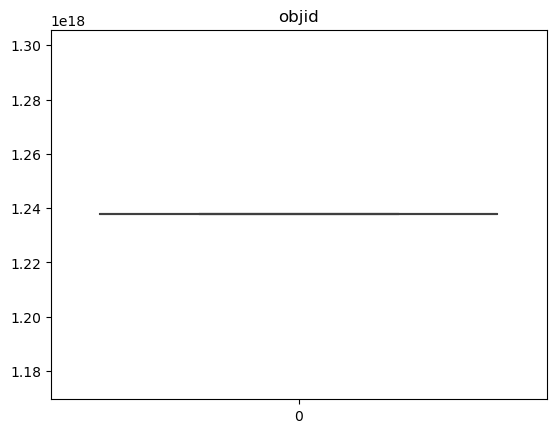

Skewness -1.2273504070233296
box-plot:


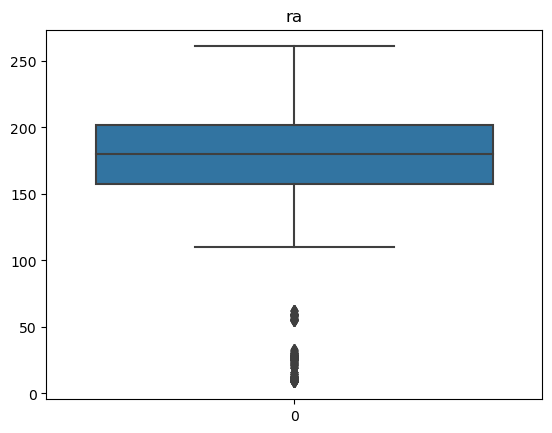

Skewness 1.1915436677350355
box-plot:


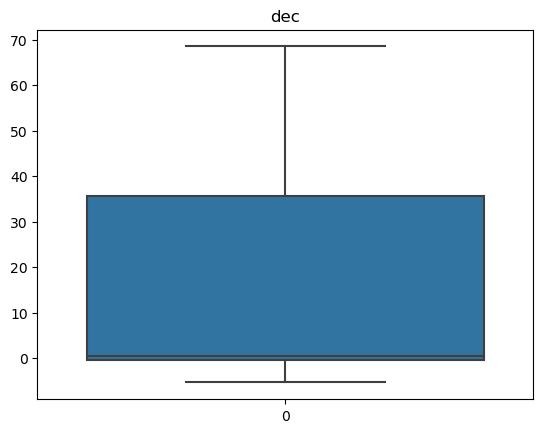

Skewness -1.2197948126863525
box-plot:


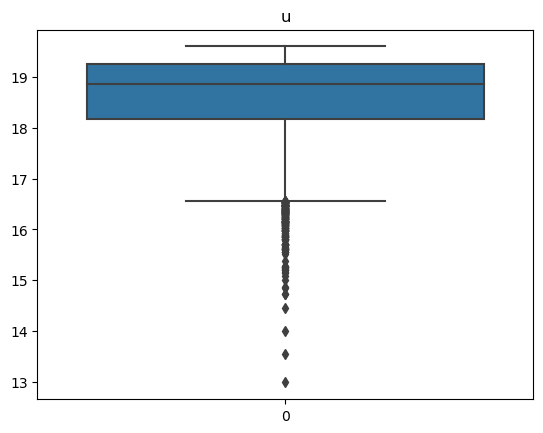

Skewness -0.5362927436919478
box-plot:


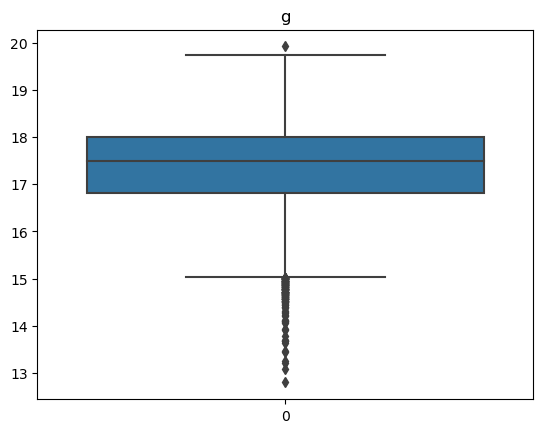

Skewness -0.02167290243891162
box-plot:


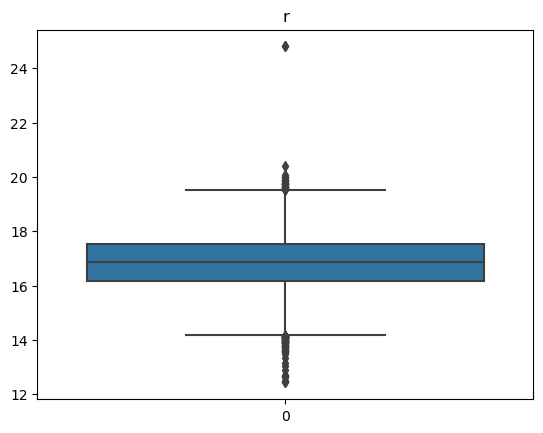

Skewness 0.28644190573919986
box-plot:


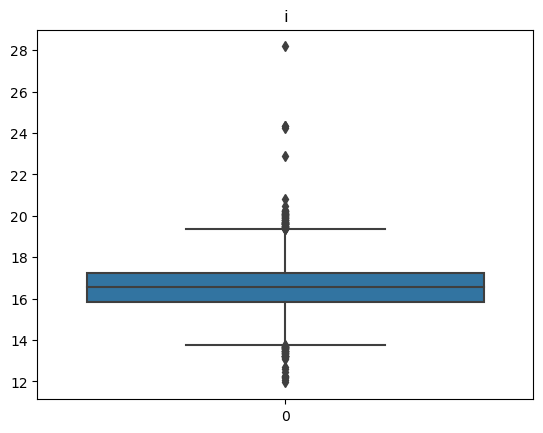

Skewness 0.21431282727249384
box-plot:


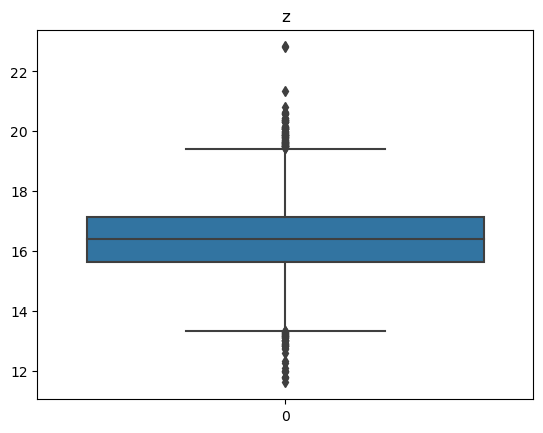

Skewness 0.41255485771356115
box-plot:


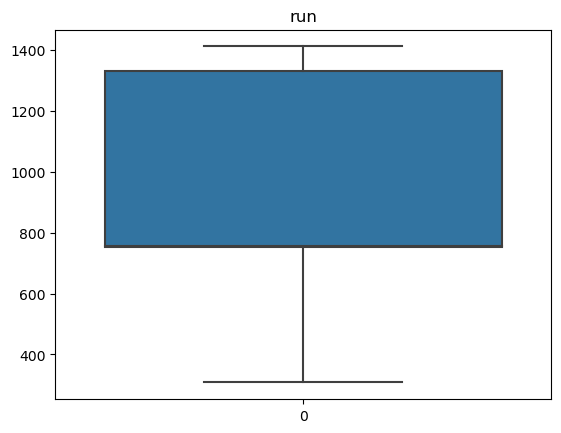

Skewness 0
box-plot:


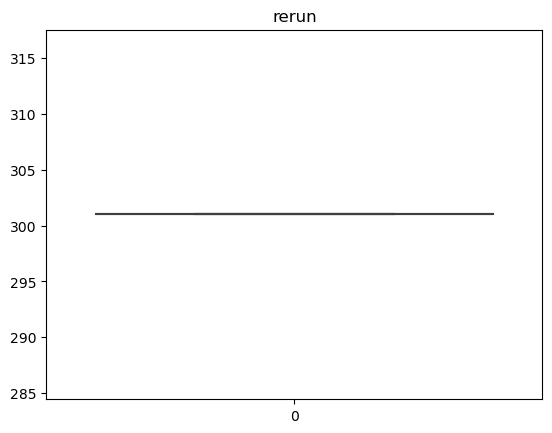

Skewness -0.1002196013747432
box-plot:


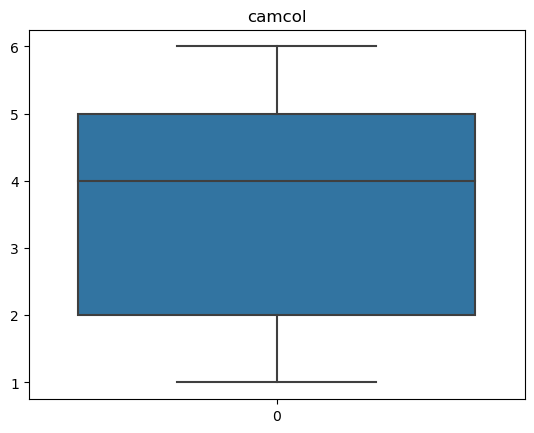

Skewness 0.24979529914600934
box-plot:


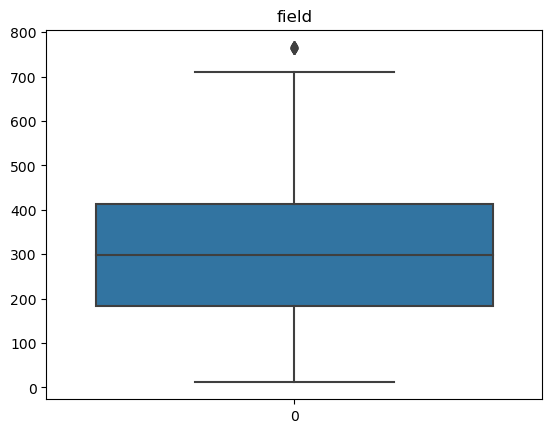

Skewness 1.7946272383832214
box-plot:


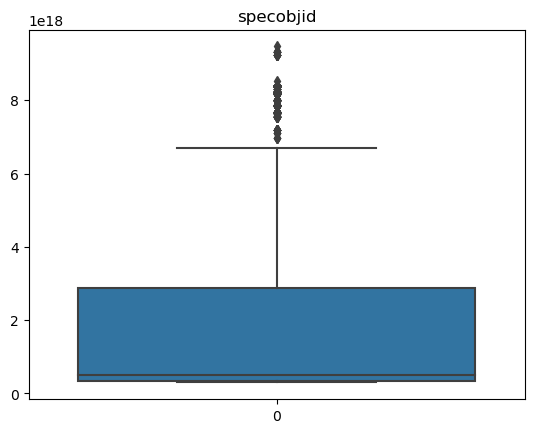

Skewness 4.26572914322377
box-plot:


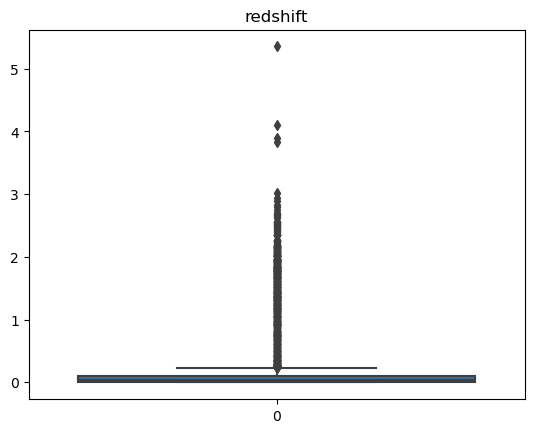

Skewness 1.7946094444631788
box-plot:


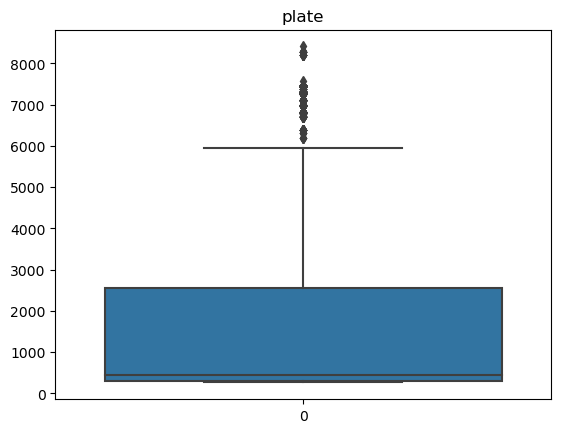

Skewness 1.0396102031129317
box-plot:


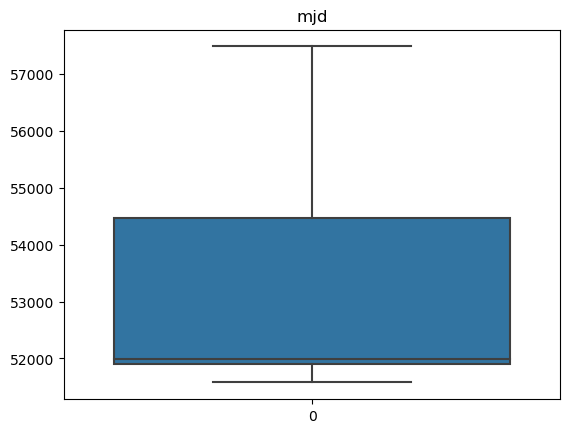

Skewness 0.3080532503622125
box-plot:


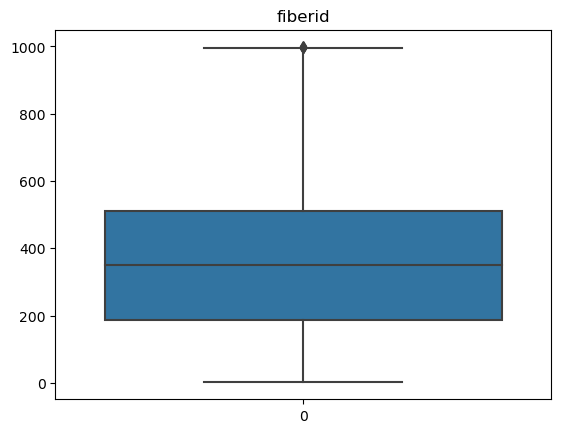

In [13]:
for col in data.columns:
    if col not in ['class']:
        print('Skewness',data[col].skew())
        print('box-plot:')
        sns.boxplot(data[col])
        plt.title(col)
        plt.show()

In [14]:
for col in data.drop('class',axis=1).columns:
    lower_limit ,upper_limit = data[col].quantile([0.25,0.75])
    iqr = upper_limit-lower_limit
    lower=lower_limit - 1.5*iqr
    upper=upper_limit + 1.5*iqr
    data[col] = np.where(data[col]>upper,upper ,np.where(data[col]<lower,lower,data[col]))

box-plot:


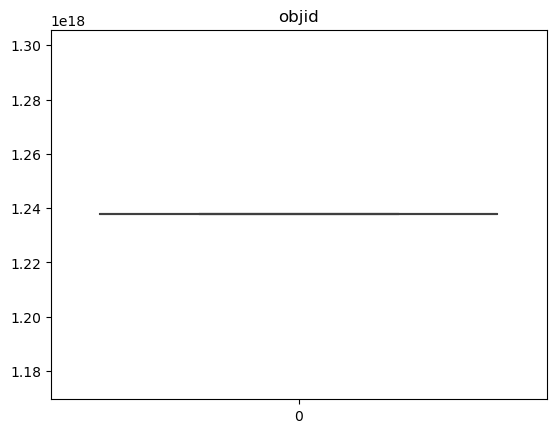

box-plot:


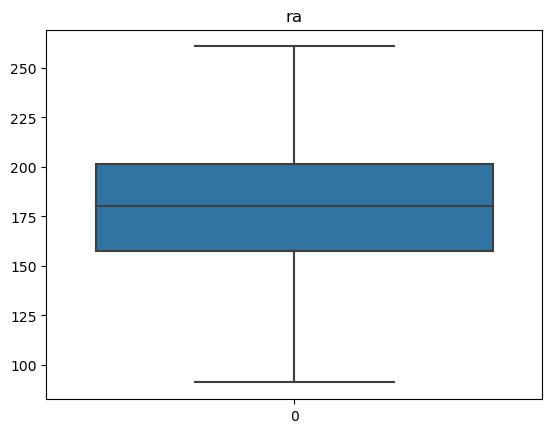

box-plot:


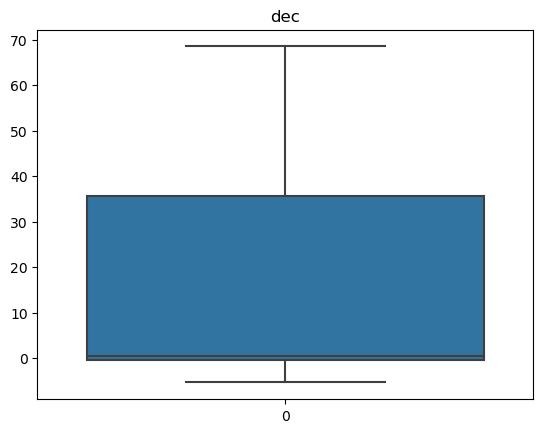

box-plot:


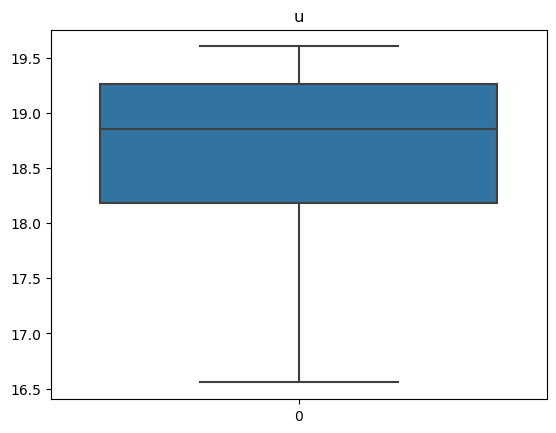

box-plot:


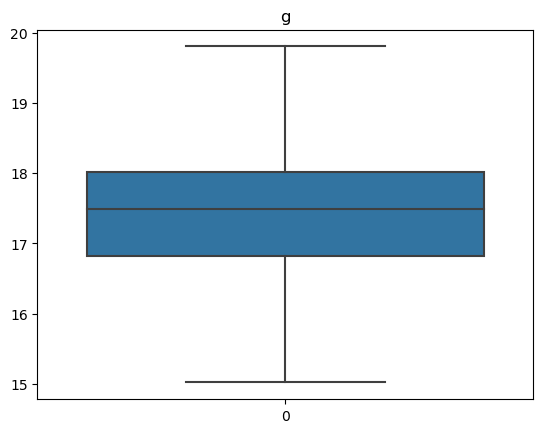

box-plot:


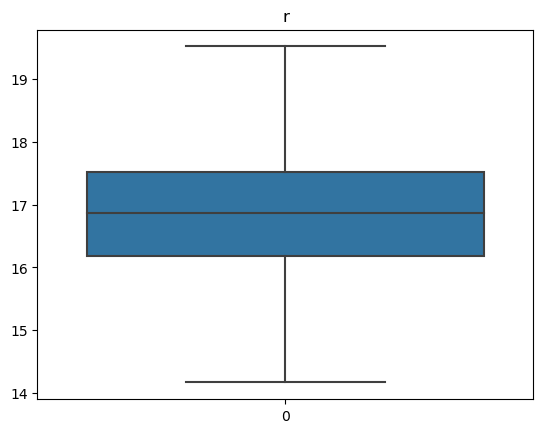

box-plot:


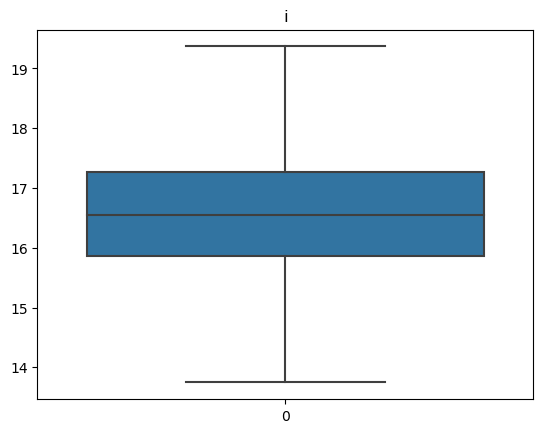

box-plot:


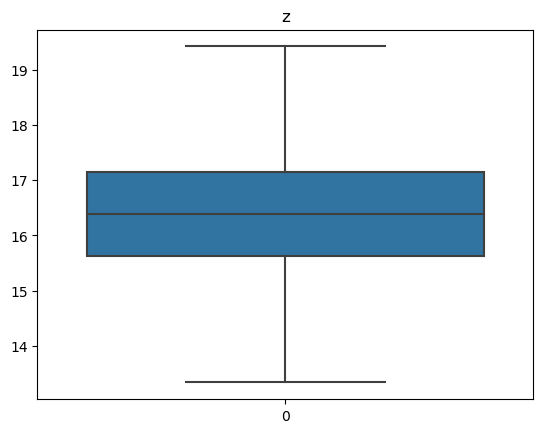

box-plot:


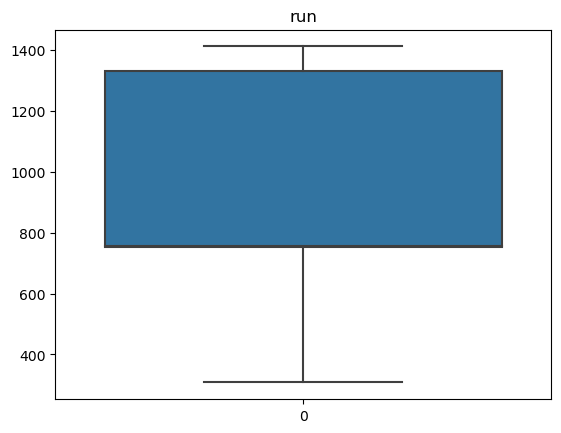

box-plot:


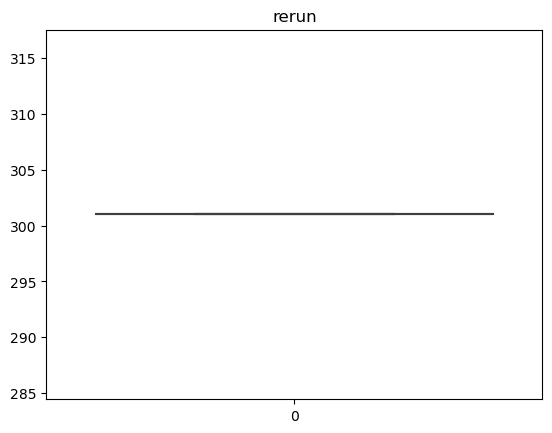

box-plot:


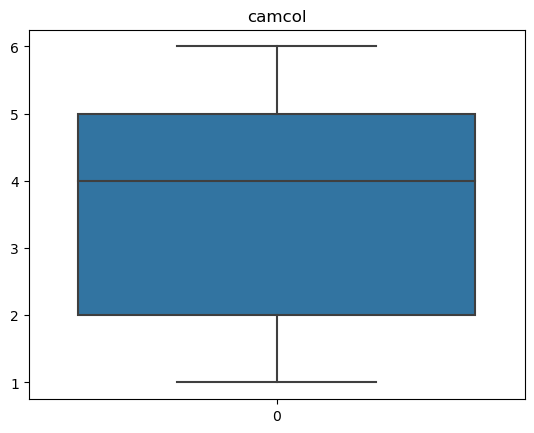

box-plot:


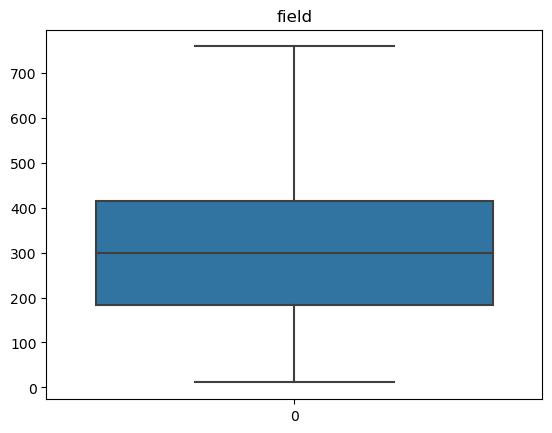

box-plot:


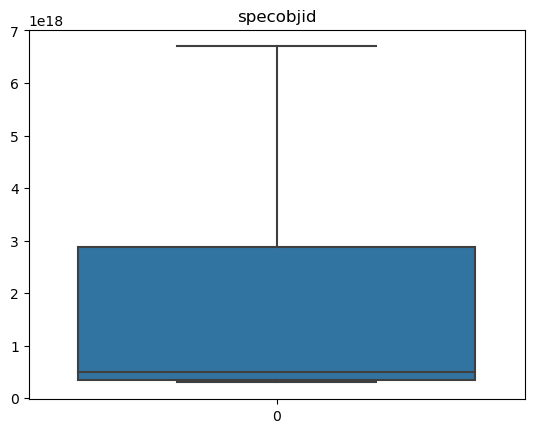

box-plot:


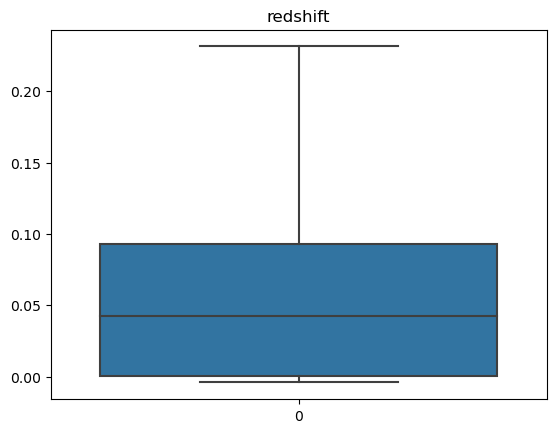

box-plot:


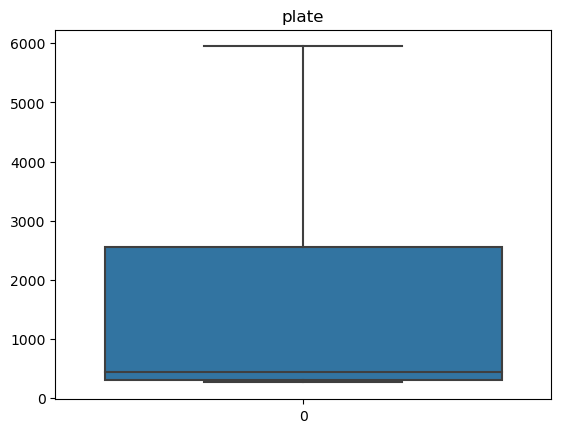

box-plot:


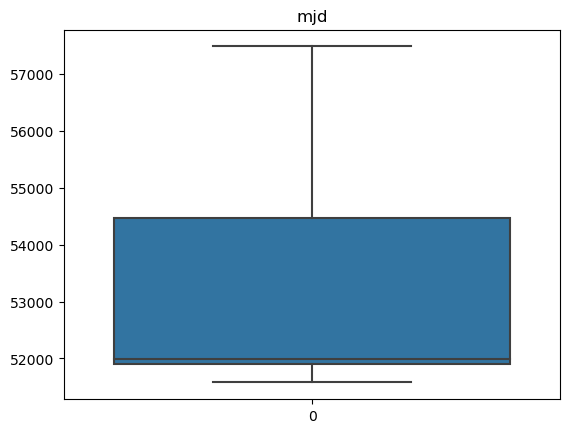

box-plot:


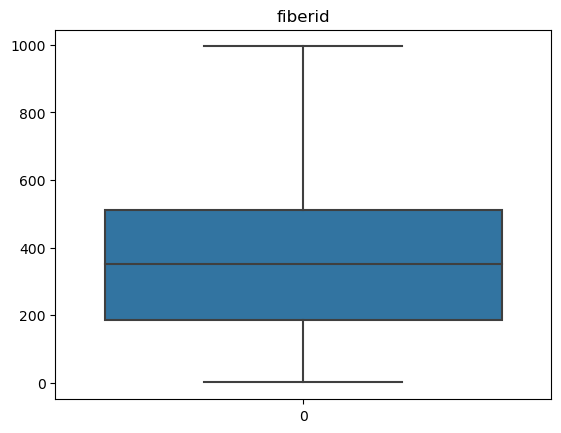

In [15]:
for col in data.columns:
    if col not in ['class']:
        print('box-plot:')
        sns.boxplot(data[col])
        plt.title(col)
        plt.show()

<Axes: xlabel='class'>

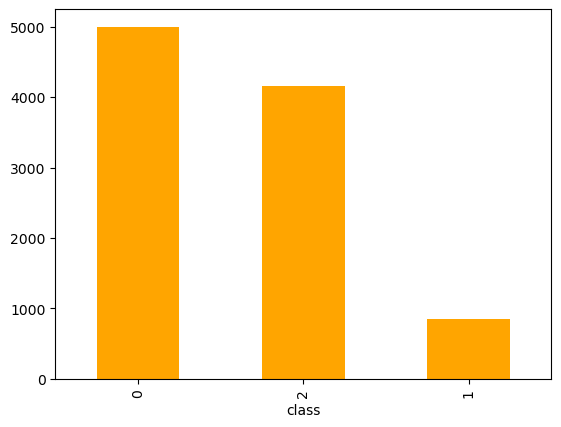

In [16]:
data['class'].value_counts().plot(kind='bar',color='orange')

In [17]:
x = data.drop('class', axis=1)
y = data['class']

In [18]:
scaler = StandardScaler(copy=True)

In [19]:
x_scaled = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

Feature selection

In [20]:
model = ExtraTreesClassifier()
model.fit(x_scaled,y)

ExtraTreesClassifier()

In [21]:
col=x.columns
feature_imp = pd.Series(model.feature_importances_,index=col)
feature_imp

objid        0.000000
ra           0.007764
dec          0.008078
u            0.029432
g            0.023795
r            0.042020
i            0.054905
z            0.053801
run          0.005631
rerun        0.000000
camcol       0.004032
field        0.006900
specobjid    0.126572
redshift     0.400697
plate        0.125905
mjd          0.104149
fiberid      0.006317
dtype: float64

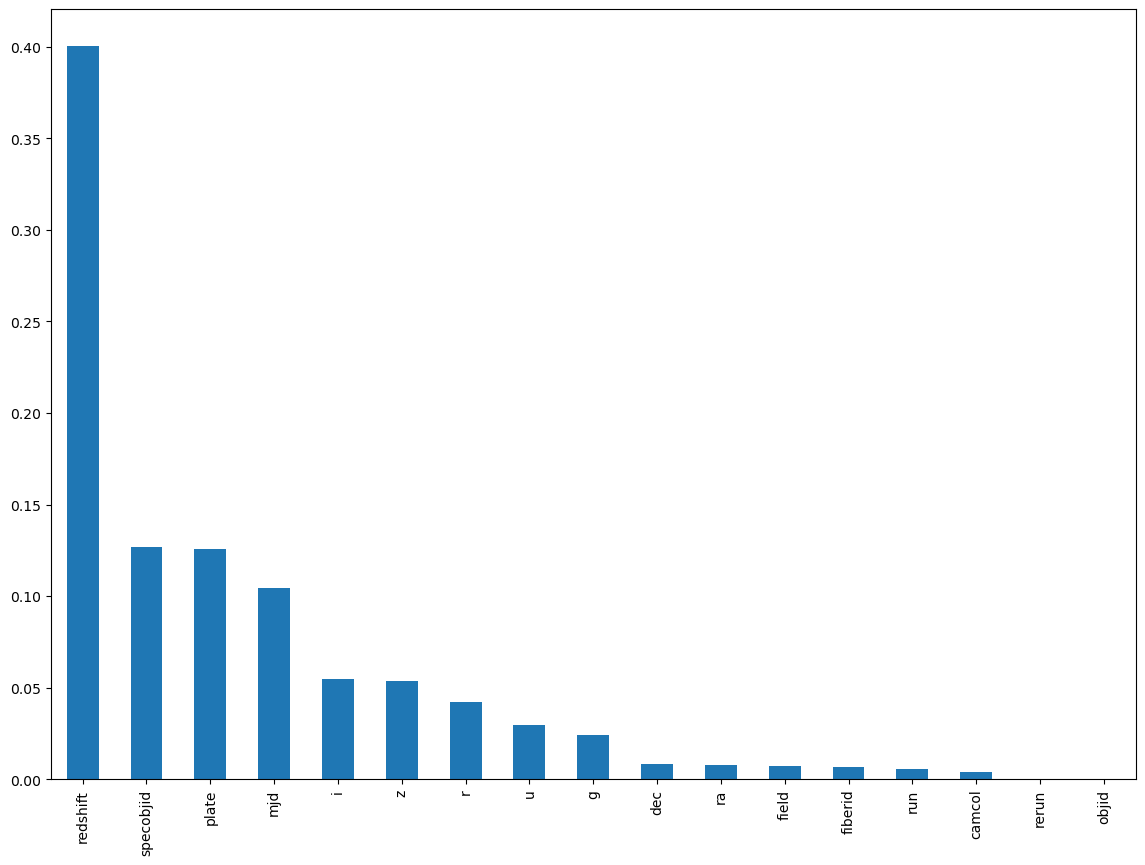

In [22]:
plt.figure(figsize=(14,10))
feature_imp.nlargest(17).plot(kind="bar")
plt.show()

In [23]:
x_scaled= x_scaled.drop(columns=['rerun','objid'],axis=1)

In [24]:
x_scaled.shape

(10000, 15)

In [25]:
smk = RandomOverSampler(random_state=42)
x_res,y_res = smk.fit_resample(x_scaled,y)

In [26]:
print(Counter(y_res))

Counter({2: 4998, 0: 4998, 1: 4998})


<Axes: ylabel='count'>

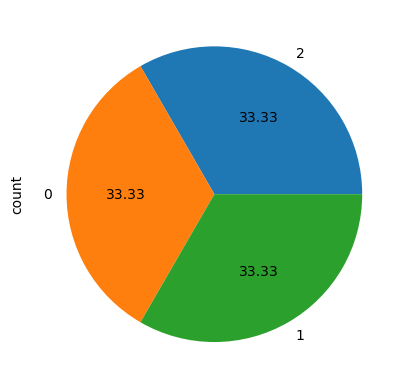

In [27]:
y_res.value_counts().plot(kind='pie',autopct='%.2f')

In [28]:
# splitting the data
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=90)

In [29]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(11995, 15) (2999, 15)
(11995,) (2999,)


Model Buliding

In [30]:
para = {'max_depth':np.arange(2,50,12)}
dt_classifier = DecisionTreeClassifier()
model = RandomizedSearchCV(dt_classifier,param_distributions=para,random_state=42)
model.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([ 2, 14, 26, 38])},
                   random_state=42)

In [31]:
pred = model.predict(x_test)

In [32]:
pred

array([2, 0, 2, ..., 1, 2, 1])

In [33]:
acc=accuracy_score(y_test,pred)
print(acc)

0.9943314438146049


In [34]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       983
           1       0.99      1.00      0.99       971
           2       1.00      1.00      1.00      1045

    accuracy                           0.99      2999
   macro avg       0.99      0.99      0.99      2999
weighted avg       0.99      0.99      0.99      2999



In [35]:
pickle.dump(model,open('galaxy.pkl','wb'))

In [36]:
file = pickle.load(open('galaxy.pkl','rb'))